#  Projeto "Vai chover amanhã?" - Parte 2

In [919]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import pandas as pd
from sklearn.metrics import precision_score, recall_score, roc_auc_score, plot_roc_curve,accuracy_score
import warnings
warnings.simplefilter("ignore")

## Leitura dos dados

In [827]:
rain1 = pd.read_csv('data/rain_data_aus.csv')
rain1.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,29.48,28.400000,12,5.115360,0.089825
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,32.12,2.208569,10,21.497100,0.023477
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,32.84,38.000000,17,20.782859,0.027580
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,35.60,21.200000,8,12.028646,0.023962
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,40.76,41.600000,9,11.883546,0.220164


In [828]:
wind_table_01 = pd.read_csv('data/wind_table_01.csv')

In [829]:
wind_table_01.head()

,date,location,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm
0,2007-11-01,Canberra,NW,30.0,SW,NW,6.0,20.0
1,2007-11-02,Canberra,ENE,39.0,E,W,4.0,17.0
2,2007-11-03,Canberra,NW,85.0,N,NNE,6.0,6.0
3,2007-11-04,Canberra,NW,54.0,WNW,W,30.0,24.0
4,2007-11-05,Canberra,SSE,50.0,SSE,ESE,20.0,28.0


In [830]:
wind_table_02 = pd.read_csv('data/wind_table_02.csv')
wind_table_03 = pd.read_csv('data/wind_table_03.csv')
wind_table_04 = pd.read_csv('data/wind_table_04.csv')
wind_table_05 = pd.read_csv('data/wind_table_05.csv')
wind_table_06 = pd.read_csv('data/wind_table_06.csv')
wind_table_07 = pd.read_csv('data/wind_table_07.csv')
wind_table_08 = pd.read_csv('data/wind_table_08.csv')

## Merge do dataframe inicial com os dataframes de ventos

In [831]:
windt=pd.concat([wind_table_01,wind_table_02,wind_table_03,wind_table_04,wind_table_05,wind_table_06,wind_table_07])
rain=pd.merge(rain1,windt, how='inner', on=['date','location'])

In [928]:
rain.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,month
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,0,29.48,28.400000,12,5.115360,0.089825,W,44.0,W,WNW,20.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,12
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,0,32.12,2.208569,10,21.497100,0.023477,WNW,44.0,NNW,WSW,4.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,12
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,0,32.84,38.000000,17,20.782859,0.027580,WSW,46.0,W,WSW,19.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,12
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,1.0,0,35.60,21.200000,8,12.028646,0.023962,NE,24.0,SE,E,11.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,12
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0,40.76,41.600000,9,11.883546,0.220164,W,41.0,ENE,NW,7.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,12


In [833]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 142192
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              142193 non-null  object 
 1   location          142193 non-null  object 
 2   mintemp           141556 non-null  float64
 3   maxtemp           141871 non-null  float64
 4   rainfall          140787 non-null  float64
 5   evaporation       81350 non-null   float64
 6   sunshine          74377 non-null   float64
 7   humidity9am       140419 non-null  float64
 8   humidity3pm       138583 non-null  float64
 9   pressure9am       128179 non-null  float64
 10  pressure3pm       128212 non-null  float64
 11  cloud9am          88536 non-null   float64
 12  cloud3pm          85099 non-null   float64
 13  temp9am           141289 non-null  float64
 14  temp3pm           139467 non-null  float64
 15  raintoday         140787 non-null  object 
 16  amountOfRain      14

## Criação coluna "mês"

In [837]:
rain['date'] = pd.to_datetime(rain['date'])

In [838]:
rain['month']=[rain['date'][i].month for i in range(len(rain))]

In [839]:
rain['month'] = rain['month'].astype('str')

In [840]:
rain.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,month
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,29.48,28.400000,12,5.115360,0.089825,W,44.0,W,WNW,20.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,12
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,32.12,2.208569,10,21.497100,0.023477,WNW,44.0,NNW,WSW,4.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,12
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,32.84,38.000000,17,20.782859,0.027580,WSW,46.0,W,WSW,19.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,12
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,35.60,21.200000,8,12.028646,0.023962,NE,24.0,SE,E,11.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,12
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,40.76,41.600000,9,11.883546,0.220164,W,41.0,ENE,NW,7.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,12


## Transformação de colunas categóricas para numéricas

In [841]:
rain["raintoday"]=rain["raintoday"].replace({"No": 0, "Yes": 1})

In [842]:
rain["raintomorrow"]=rain["raintomorrow"].replace({"No": 0, "Yes": 1})

## Visualização da correlação entre as variáveis

In [843]:
rain.corr()['amountOfRain'].sort_values(ascending=False)

amountOfRain        1.000000
raintomorrow        0.501485
modelo_vigente      0.498879
humidity3pm         0.313183
rainfall            0.308557
humidity            0.286599
cloud3pm            0.234814
raintoday           0.223120
cloud9am            0.198095
humidity9am         0.172417
windgustspeed       0.166647
wind_gustspeed      0.154747
mintemp             0.124743
windspeed9am        0.070185
wind_speed9am       0.067612
windspeed3pm        0.052481
temp9am             0.051232
wind_speed3pm       0.041338
precipitation3pm   -0.001491
precipitation9am   -0.002363
temp               -0.034996
evaporation        -0.043498
maxtemp            -0.044208
temp3pm            -0.066817
pressure9am        -0.163673
pressure3pm        -0.164184
sunshine           -0.294973
Name: amountOfRain, dtype: float64

In [844]:
pd.options.display.max_columns=50 

## Exclusão das colunas e definição de X e y

In [872]:
X=rain.drop(columns=['wind_speed3pm','wind_speed9am','wind_dir3pm','wind_dir9am','wind_gustspeed','wind_gustdir','cloud9am','date','temp9am','precipitation3pm','precipitation9am','temp','evaporation','maxtemp','temp3pm','modelo_vigente','amountOfRain','raintomorrow','humidity'])

In [873]:
y=rain['raintomorrow']

In [874]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 142192
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   location       142193 non-null  object 
 1   mintemp        141556 non-null  float64
 2   rainfall       140787 non-null  float64
 3   sunshine       74377 non-null   float64
 4   humidity9am    140419 non-null  float64
 5   humidity3pm    138583 non-null  float64
 6   pressure9am    128179 non-null  float64
 7   pressure3pm    128212 non-null  float64
 8   cloud3pm       85099 non-null   float64
 9   raintoday      140787 non-null  float64
 10  windgustdir    96444 non-null   object 
 11  windgustspeed  96497 non-null   float64
 12  winddir9am     95248 non-null   object 
 13  winddir3pm     99425 non-null   object 
 14  windspeed9am   101545 non-null  float64
 15  windspeed3pm   100235 non-null  float64
 16  month          142193 non-null  object 
dtypes: float64(12), object(5)
mem

## Definição das variáveis treino e teste

In [877]:
from sklearn.model_selection import train_test_split

In [875]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

## Construção da pipeline

In [908]:
from sklearn.pipeline import Pipeline

In [884]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [881]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

ordinal_encoder = OrdinalEncoder()
onehotencoder = OneHotEncoder(drop='first',  handle_unknown='error')

In [879]:
cat_columns = list(X_train.select_dtypes(['object']).columns)
cat_columns

['location', 'windgustdir', 'winddir9am', 'winddir3pm', 'month']

In [882]:
num_columns = list(X_train.select_dtypes(exclude=['object','datetime']).columns)
num_columns

['mintemp',
 'rainfall',
 'sunshine',
 'humidity9am',
 'humidity3pm',
 'pressure9am',
 'pressure3pm',
 'cloud3pm',
 'raintoday',
 'windgustspeed',
 'windspeed9am',
 'windspeed3pm']

In [883]:
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

In [885]:
categorical_pipeline = Pipeline(steps=[('missing', categorical_imputer),
                                       ('encode', ordinal_encoder)])

In [886]:
numerical_pipeline = Pipeline(steps=[('missing', numerical_imputer),
                                     ('standardize', scaler)])

In [887]:
from sklearn.compose import ColumnTransformer

dataprep = ColumnTransformer(transformers=[('numerical_transform', numerical_pipeline, num_columns),
                                           ('categ_transform', categorical_pipeline, cat_columns)])

In [889]:
model_lgbm = LGBMClassifier(max_depth=8, n_estimators=300)#scale_pos_weight=1.86)

In [890]:
pipeline = Pipeline(steps=[('preprocessing', dataprep),
                           ('modelling', model_lgbm)])

In [892]:
pipeline.fit(X_train,y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical_transform',
                                                  Pipeline(steps=[('missing',
                                                                   SimpleImputer()),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['mintemp', 'rainfall',
                                                   'sunshine', 'humidity9am',
                                                   'humidity3pm', 'pressure9am',
                                                   'pressure3pm', 'cloud3pm',
                                                   'raintoday', 'windgustspeed',
                                                   'windspeed9am',
                                                   'windspeed3pm']),
                                

In [893]:
pipeline.score(X_train,y_train)

0.8778459172574172

In [894]:
pipeline.score(X_test,y_test)

0.8589271146867704

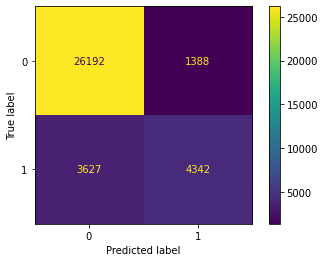

In [899]:
plot_confusion_matrix(pipeline, X_test, y_test, values_format='.0f')

In [896]:
precision_score(y_test,pipeline.predict(X_test))

0.7577661431064573

In [897]:
recall_score(y_test,pipeline.predict(X_test))

0.5448613376835236

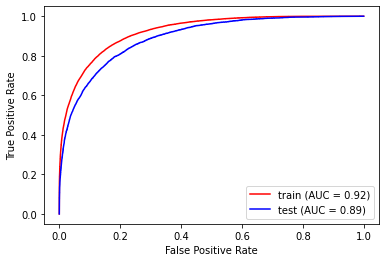

In [898]:
fig, ax = plt.subplots()

plot_roc_curve(pipeline, X_train, y_train, color='red', ax= ax, name='train')
plot_roc_curve(pipeline, X_test, y_test, color='blue', ax=ax, name='test')

## Análise das probabilidades

In [803]:
import seaborn as sns

<AxesSubplot:ylabel='Density'>

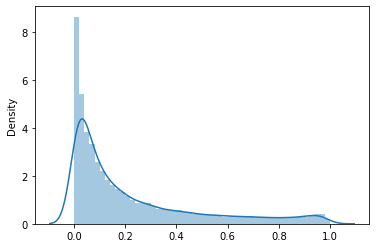

In [800]:
sns.distplot(pipeline.predict_proba(X_test)[:,1])

## Construção de modelo alternativo mudando o threshold de 0.5 para 0.25

In [916]:
pipeline.score(X_train, y_train)

0.8778459172574172

In [917]:
pipeline.score(X_test,y_test)

0.8589271146867704

In [921]:
accuracy_score(y_test,(pipeline.predict_proba(X_test)[:,1]>0.3))

0.8367323975357956

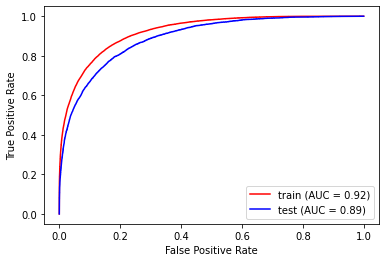

In [926]:
fig, ax = plt.subplots()

plot_roc_curve(pipeline, X_train, y_train, color='red', ax= ax, name='train')
plot_roc_curve(pipeline, X_test, y_test, color='blue', ax=ax, name='test')

<AxesSubplot:>

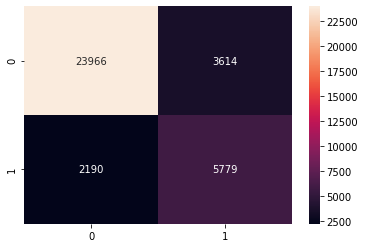

In [922]:
sns.heatmap(confusion_matrix(y_test,(pipeline.predict_proba(X_test)[:,1]>0.3)),annot=True,fmt="d")

In [923]:
pipeline.predict_proba(X_test)[:,1]

array([0.26911846, 0.18466699, 0.10737412, ..., 0.17659532, 0.37824944,
       0.86433413])

In [924]:
recall_score(y_test,pipeline.predict_proba(X_test)[:,1]>0.3)

0.7251850922324006

In [925]:
precision_score(y_test,pipeline.predict_proba(X_test)[:,1]>0.3)

0.6152453955072926

O modelo alternativo trouxe uma acurácia(score)um pouco menor que o primeiro modelo, mas um  recall superior. Como a distribuição das probabilidades estava muito desequilibrada, ao diminuir o threshold, o novo modelo diminuiu o erro tipo 2.

Conclusão geral: nosso modelo 1 prioriza a precisão da nossa previsão. Ou seja, dos dias que previmos que iria chover, acertamos 75%, o que é bom. Por outro lado, o recall mostra mostra que dentro dos dias que de fato choveu, o modelo acertou 54%. Modelo ruim para alguém que não quer tomar chuva. Poucas vezes a pessoa levou o guarda-chuva e não usou. Porém, deixou de levar o guarda-chuva em muitos dias que choveu.

Já o modelo 2 tem um acerto maior dos dias que de fato choveu. Porém erramos mais nos dias que previmos que ia chover, e não choveu.

Entendemos que nesse caso de previsão de chuva, o modelo 2 é mais adequado. Em geral, é mais importante acertar quando vai chover, que o inverso.